In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mping
import glob
import os
import shutil

In [117]:
# Environment variable
main_data_dir = 'D:/Data/HAM100000 - Harvard Dataset'
metadata_dir = main_data_dir + '/HAM10000_metadata.csv'
img_data_dir = main_data_dir + '/img_data'
test_data_dir = main_data_dir + '/test'
test_label_dir = main_data_dir + '/test_label.csv'
preprocessed_data_dir = main_data_dir + '/preprocessed_data'
train_dir = preprocessed_data_dir + '/train'
val_dir = preprocessed_data_dir + '/val'

train_label_path = preprocessed_data_dir + '/train_label.csv'
test_label_path = preprocessed_data_dir + '/val_label.csv'

In [99]:
data_pd = pd.read_csv(metadata_dir)
data_pd.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [100]:
data_pd = data_pd.dropna()
data_pd.shape

(9958, 8)

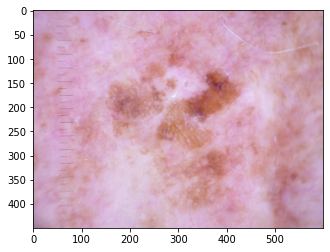

In [101]:
img = mping.imread(preprocessed_img_paths[0])
imgplot = plt.imshow(img)
plt.show()

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
train_df, test_df = train_test_split(data_pd, test_size=0.1, stratify=data_pd['dx'])

In [104]:
def identify_trainOrtest(x):
    test_data = set(test_df['image_id'])
    if str(x) in test_data:
        return 'test'
    else:
        return 'train'

#creating train_df
data_pd['train_test_split'] = data_pd['image_id'].apply(identify_trainOrtest)
train_df = data_pd[data_pd['train_test_split'] == 'train']
train_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,train_test_split
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,train
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,train
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,train
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,train
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,train


In [105]:
test_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
2973,HAM_0001215,ISIC_0031531,bcc,histo,70.0,male,back,vidir_modern
483,HAM_0005146,ISIC_0026526,bkl,histo,60.0,male,face,rosendahl
8870,HAM_0006323,ISIC_0026805,nv,histo,75.0,female,lower extremity,rosendahl
1991,HAM_0003176,ISIC_0030756,mel,histo,85.0,male,chest,vienna_dias
8324,HAM_0003345,ISIC_0024834,nv,histo,70.0,male,chest,vienna_dias


In [106]:
train_list = list(train_df['image_id'])
test_list = list(test_df['image_id'])
print("Number of train: {}".format(len(train_list)))
print("Number of test: {}".format(len(test_list)))

Number of train: 8962
Number of test: 996


In [107]:
data_pd.set_index('image_id', inplace=True)

In [108]:
targetnames = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

In [109]:
# for i in targetnames:
#   directory1=train_dir+'/'+i
#   directory2=val_dir+'/'+i
#   os.mkdir(directory1)
#   os.mkdir(directory2)

In [110]:
# for img in train_list:
#     filename = img + '.jpg'
#     label = data_pd.loc[img, 'dx']
    
#     source = img_data_dir + '/' + filename
    
#     target = os.path.join(train_dir, label, filename)
    
#     shutil.copyfile(source, target)

In [111]:
# for img in test_list:
#     filename = img + '.jpg'
#     label = data_pd.loc[img, 'dx']
    
#     source = img_data_dir + '/' + filename
#     target = os.path.join(val_dir, label, filename)
    
#     shutil.copyfile(source, target)

In [112]:
train_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,train_test_split
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,train
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,train
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,train
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,train
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,train


In [113]:
drop_train = train_df.drop(['lesion_id', 'dx_type', 'dataset', 'train_test_split'], axis = 1)
drop_test = test_df.drop(['lesion_id', 'dx_type', 'dataset'], axis = 1)

In [114]:
drop_train.head()

,image_id,dx,age,sex,localization
0,ISIC_0027419,bkl,80.0,male,scalp
1,ISIC_0025030,bkl,80.0,male,scalp
2,ISIC_0026769,bkl,80.0,male,scalp
3,ISIC_0025661,bkl,80.0,male,scalp
4,ISIC_0031633,bkl,75.0,male,ear


In [115]:
drop_test.head()

,image_id,dx,age,sex,localization
2973,ISIC_0031531,bcc,70.0,male,back
483,ISIC_0026526,bkl,60.0,male,face
8870,ISIC_0026805,nv,75.0,female,lower extremity
1991,ISIC_0030756,mel,85.0,male,chest
8324,ISIC_0024834,nv,70.0,male,chest


In [118]:
drop_train.to_csv(train_label_path)
drop_test.to_csv(test_label_path)